## Explain Any Models with the SHAP Values

* Please read [Explain Any Models with the SHAP Values](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

In [1]:
import shap
shap.initjs()
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('winequality-red.csv') # ,sep=';')

In [3]:
df.shape

(1599, 12)

In [4]:
df.columns
df['quality'] = df['quality'].astype(int)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

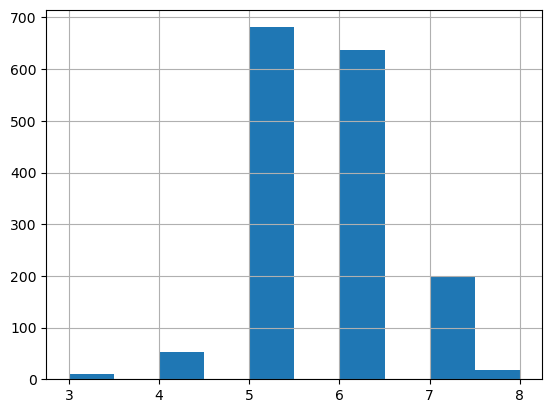

In [6]:
df['quality'].hist()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

Y = df['quality']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [9]:
X_test.shape

(160, 11)

In [10]:
X_test.mean()

fixed acidity            8.239375
volatile acidity         0.513281
citric acid              0.269812
residual sugar           2.557500
chlorides                0.086425
free sulfur dioxide     14.981250
total sulfur dioxide    42.506250
density                  0.996653
pH                       3.318500
sulphates                0.652063
alcohol                 10.481250
dtype: float64

In [11]:
X_test.iloc[10,:]

fixed acidity            8.60000
volatile acidity         0.52000
citric acid              0.38000
residual sugar           1.50000
chlorides                0.09600
free sulfur dioxide      5.00000
total sulfur dioxide    18.00000
density                  0.99666
pH                       3.20000
sulphates                0.52000
alcohol                  9.40000
Name: 1099, dtype: float64

### Random Forest

[0.03279718 0.16212684 0.01720764 0.03965912 0.03606932 0.01562006
 0.07127238 0.03328242 0.03568697 0.16817872 0.38809936]


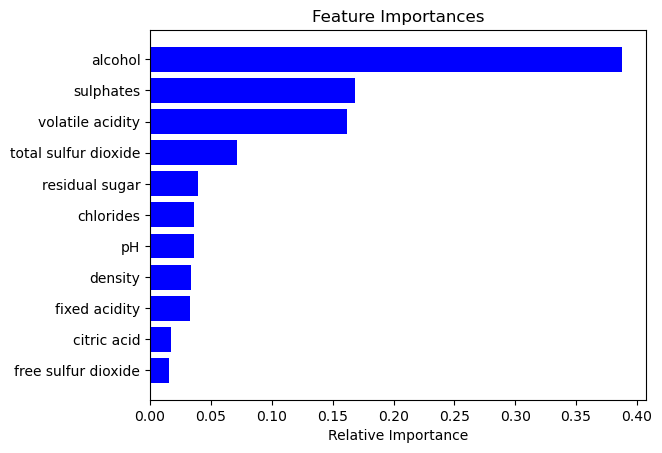

In [12]:
rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)  
print(rf.feature_importances_)

importances = rf.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [13]:
X_test[0:1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,10.8,0.47,0.43,2.1,0.171,27.0,66.0,0.9982,3.17,0.76,10.8


In [14]:
import shap
shap.initjs()
rf_explainer = shap.KernelExplainer(rf.predict, X_test)
rf_shap_values = rf_explainer.shap_values(X_test)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
Using 160 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/160 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fit

In [15]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
...,...,...,...,...,...,...,...,...,...,...,...
31,6.9,0.685,0.00,2.50,0.105,22.0,37.0,0.99660,3.46,0.57,10.6
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0
223,8.6,0.645,0.25,2.00,0.083,8.0,28.0,0.99815,3.28,0.60,10.0
1121,6.6,0.500,0.00,1.80,0.062,21.0,28.0,0.99352,3.44,0.55,12.3


In [17]:
# rf_explainer(X_test)

In [18]:
rf_shap_values

array([[ 3.64005416e-02, -6.45231260e-02,  2.94241560e-02, ...,
         1.51083024e-02,  1.63398046e-01,  1.22730908e-01],
       [-4.68858898e-04, -2.34612849e-01, -3.27726890e-02, ...,
         1.92716840e-02, -2.53740483e-01, -2.12899744e-01],
       [ 1.08545221e-02,  1.54887063e-01,  3.21085057e-03, ...,
         2.66214205e-02,  3.15967296e-01,  4.94112403e-01],
       ...,
       [-2.44946600e-05, -3.68030723e-02, -5.30135105e-03, ...,
         2.45625449e-02, -1.30739674e-02, -1.21185587e-01],
       [ 3.70472552e-03, -2.56979137e-02,  1.52523453e-02, ...,
        -5.54691897e-02, -2.09071922e-01,  4.95037468e-01],
       [ 1.10540169e-02,  1.62021738e-01,  1.25478782e-02, ...,
         9.38130473e-03,  2.48350589e-01,  1.60001042e-02]])

In [19]:
rf_explainer.expected_value

5.634390395656761

In [20]:
# plot the SHAP values for the 10th observation 
shap.force_plot(rf_explainer.expected_value, rf_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")

In [21]:
shap.force_plot(rf_explainer.expected_value, rf_shap_values, X_test)

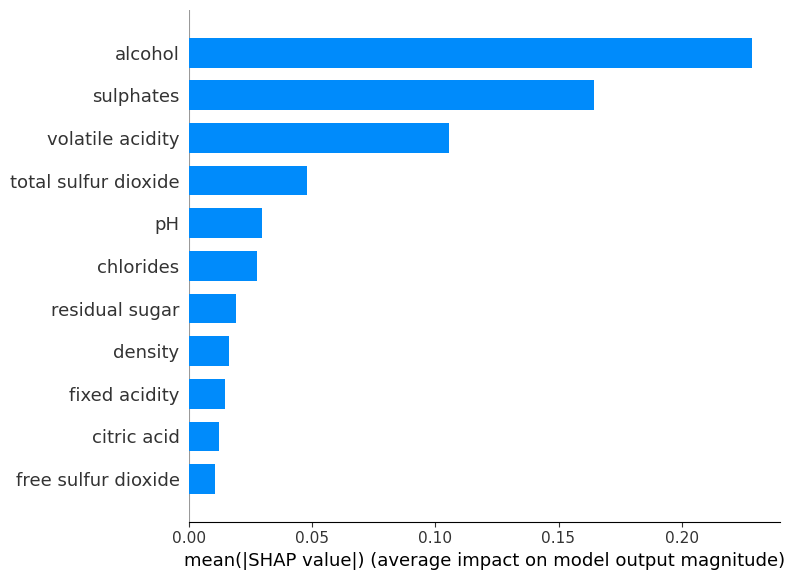

In [22]:
shap.summary_plot(rf_shap_values, X_test, plot_type="bar")

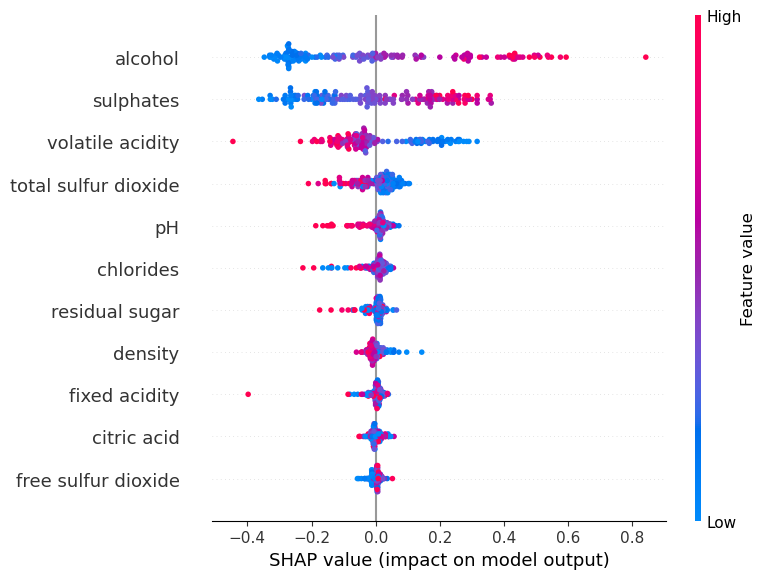

In [23]:
shap.summary_plot(rf_shap_values, X_test)

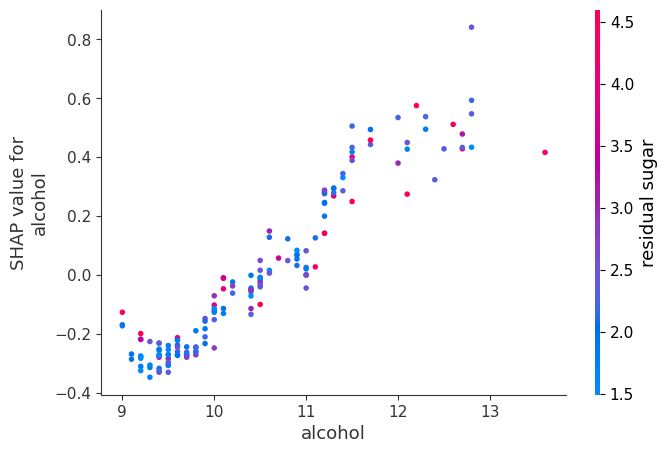

In [24]:
shap.dependence_plot("alcohol", rf_shap_values, X_test)

### GBM

In [25]:
from sklearn import ensemble
n_estimators = 500
gbm = ensemble.GradientBoostingClassifier(
            n_estimators=n_estimators,
            random_state=0)
gbm.fit(X_train, Y_train)

GradientBoostingClassifier(n_estimators=500, random_state=0)

In [26]:
gbm_explainer = shap.KernelExplainer(gbm.predict, X_test)
gbm_shap_values = gbm_explainer.shap_values(X_test)

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
Using 160 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/160 [00:00<?, ?it/s]

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
X does not have vali

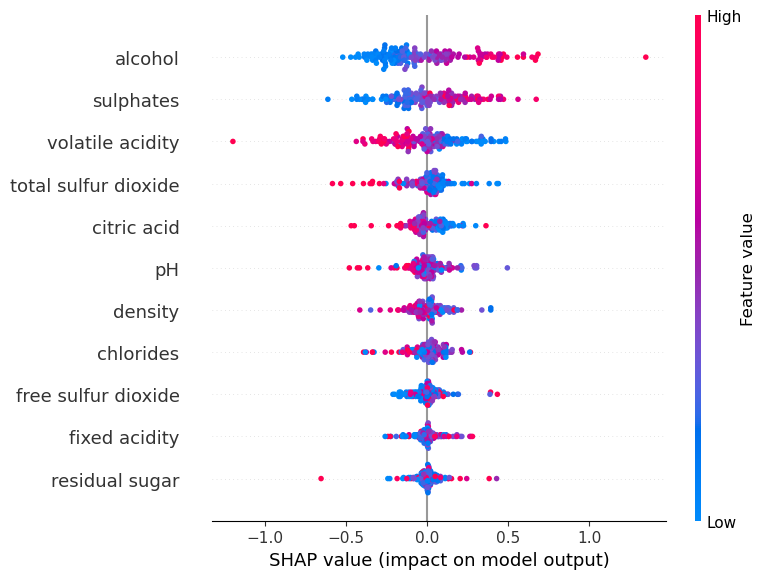

In [27]:
shap.summary_plot(gbm_shap_values, X_test)

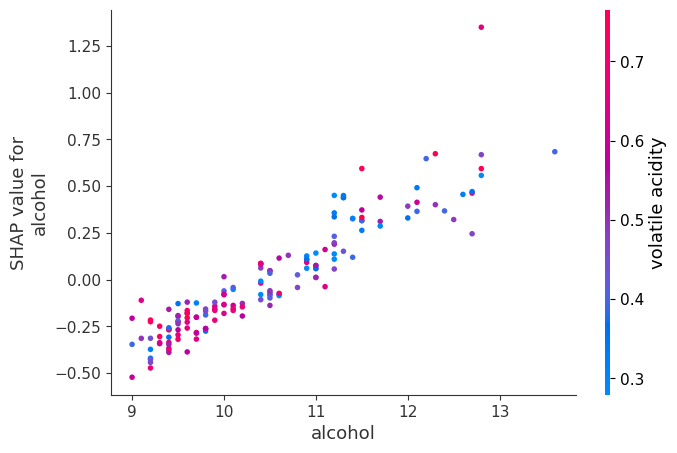

In [28]:
shap.dependence_plot("alcohol", gbm_shap_values, X_test)

In [29]:
# plot the SHAP values for the 10th observation 
shap.force_plot(gbm_explainer.expected_value,gbm_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")

In [30]:
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values, X_test)

In [33]:
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values, X_test)


# plot the SHAP values for the Setosa output of the first instance
# shap.force_plot(gbm_explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

### XGB

In [34]:
from xgboost import XGBClassifier
n_estimators = 500
xgb = ensemble.XGBClassifier(
            n_estimators=n_estimators,
            random_state=0)
xgb.fit(X_train, Y_train)

import xgboost as xgb

n_estimators = 500
xgb_model = xgb.XGBClassifier(n_estimators=n_estimators, random_state=0)
xgb_model.fit(X_train, Y_train)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [3 4 5 6 7 8]

In [ ]:
xgb_explainer = shap.KernelExplainer(rf.predict, X_test)
xgb_shap_values = xgb_explainer.shap_values(X_test)

In [ ]:
shap.dependence_plot("alcohol", xgb_shap_values, X_test)

In [ ]:
shap.force_plot(gbm_explainer.expected_value, gbm_shap_values, X_test)

### KNN

In [36]:
from sklearn import neighbors
n_neighbors = 15
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [37]:
knn_explainer = shap.KernelExplainer(knn.predict, X_test)
knn_shap_values = knn_explainer.shap_values(X_test)

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
Using 160 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/160 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with fe

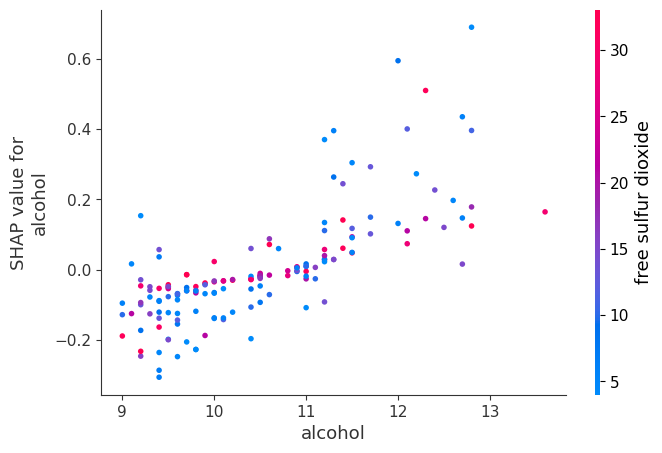

In [38]:
shap.dependence_plot("alcohol", knn_shap_values, X_test)

In [39]:
# plot the SHAP values for the 10th observation 
shap.force_plot(knn_explainer.expected_value,knn_shap_values[10,:], X_test.iloc[10,:]) 

In [40]:
shap.force_plot(knn_explainer.expected_value, knn_shap_values, X_test)

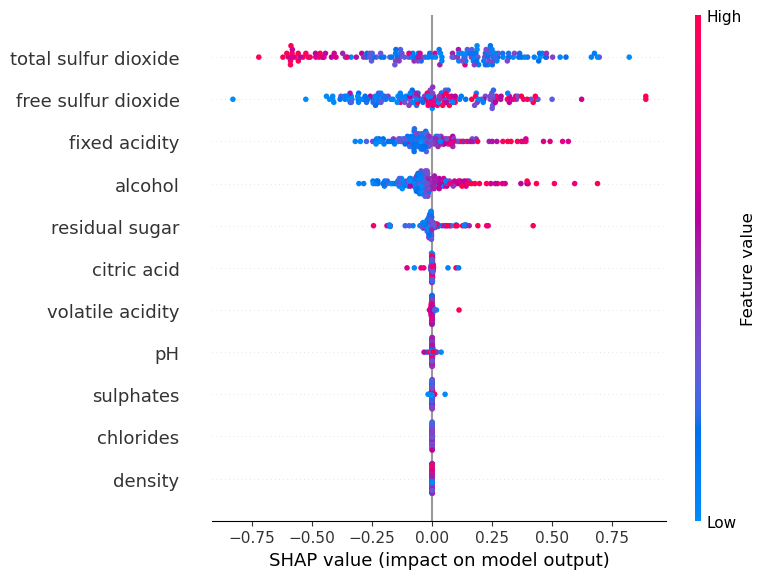

In [41]:
shap.summary_plot(knn_shap_values, X_test)

### SVM

In [42]:
from sklearn import svm
svm = svm.SVC(gamma='scale', decision_function_shape='ovo')
svm.fit(X_train, Y_train)  

SVC(decision_function_shape='ovo')

In [43]:
svm_explainer = shap.KernelExplainer(svm.predict, X_test)
svm_shap_values = svm_explainer.shap_values(X_test)

X does not have valid feature names, but SVC was fitted with feature names
Using 160 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/160 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

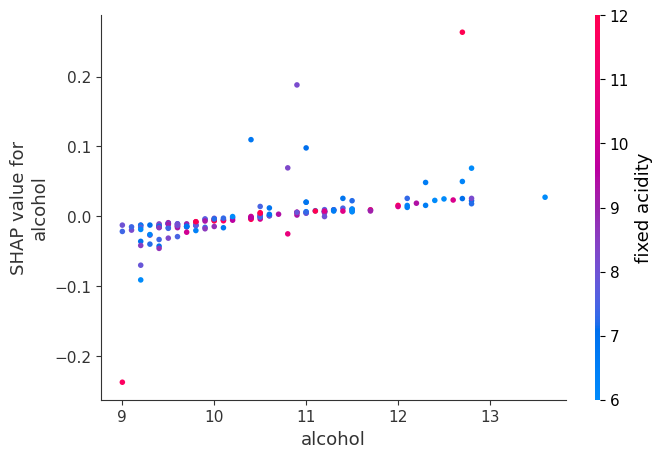

In [44]:
shap.dependence_plot("alcohol", svm_shap_values, X_test)

In [45]:
# plot the SHAP values for the 10th observation 
shap.force_plot(svm_explainer.expected_value,svm_shap_values[10,:], X_test.iloc[10,:]) 

In [46]:
shap.force_plot(svm_explainer.expected_value, svm_shap_values, X_test)

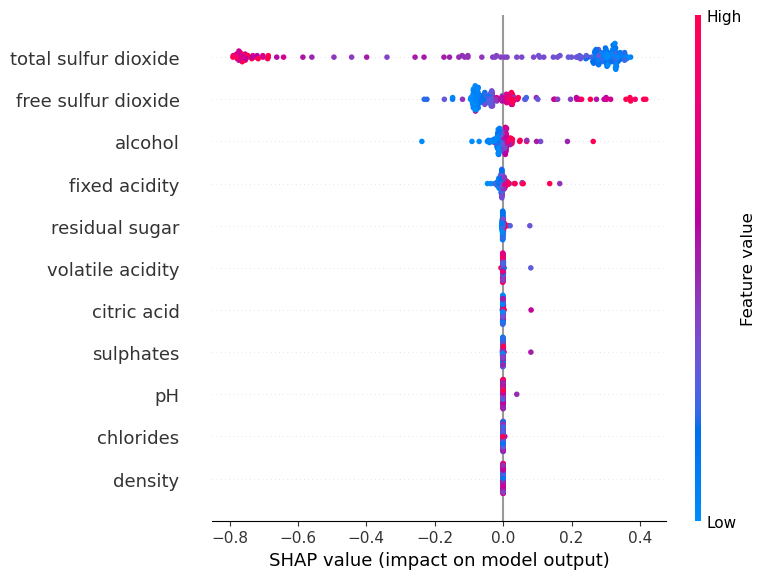

In [47]:
shap.summary_plot(svm_shap_values, X_test)

In [49]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 16.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694728 sha256=d2dc3781acf20b2a0d3b6c90ad2e028a6465121171f456b2b238ca8c1e0d8334
  Stored in directory: /Users/oliverhiggins/Library/Caches/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o


### H2O

In [50]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...


CalledProcessError: Command '['/usr/bin/java', '-version']' returned non-zero exit status 1.

In [ ]:
X_train, X_test = train_test_split(df, test_size = 0.1)

In [ ]:
X_train_hex = h2o.H2OFrame(X_train)
X_test_hex = h2o.H2OFrame(X_test)

In [ ]:
X_names =  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [ ]:
# Define model
h2o_rf = H2ORandomForestEstimator(ntrees=200, max_depth=20, nfolds=10)

# Train model
h2o_rf.train(x=X_names, y='quality', training_frame=X_train_hex)

In [ ]:
X_test = X_test_hex.drop('quality').as_data_frame()

In [ ]:
class H2OProbWrapper:
    def __init__(self, h2o_model, feature_names):
        self.h2o_model = h2o_model
        self.feature_names = feature_names

    def predict_binary_prob(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        self.dataframe= pd.DataFrame(X, columns=self.feature_names)
        self.predictions = self.h2o_model.predict(h2o.H2OFrame(self.dataframe)).as_data_frame().values
        return self.predictions.astype('float64')[:,-1] #probability of True class

In [ ]:
h2o_wrapper = H2OProbWrapper(h2o_rf,X_names)

In [ ]:
h2o_rf_explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob, X_test)

In [ ]:
h2o_rf_explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob, X_test)
h2o_rf_shap_values = h2o_rf_explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(h2o_rf_shap_values, X_test)

In [ ]:
shap.dependence_plot("alcohol", h2o_rf_shap_values, X_test)

In [ ]:
# plot the SHAP values for the 10th observation 
shap.force_plot(h2o_rf_explainer.expected_value,h2o_rf_shap_values[10,:], X_test.iloc[10,:]) #, link="logit")

In [ ]:
shap.force_plot(h2o_rf_explainer.expected_value, h2o_rf_shap_values, X_test)